## Assignment 1: Compare Tests for Goodness of fit (on real data)

### Get data 

In [144]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import pylab as pl

%matplotlib inline

In [145]:
def getCitiBikeCSV(datestring):
    
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))

            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

            if '2014' in datestring or '2013' in datestring:
                    os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                              "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))

            print("File in place, you can continue.")
            
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
                print("WARNING!!! something is wrong: the file is not there!")
    else:
        print("File in place, you can continue.")

In [148]:
datestring = "201606"
getCitiBikeCSV(datestring)

('Downloading', '201606')
File in place, you can continue.


In [7]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv').dropna()
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [122]:
# df['date'] = pd.to_datetime(df['starttime'])

In [151]:
# df.columns

### Sort data 

In [149]:
df['ageM'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [125]:
df.drop (['tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid', u'usertype'],axis =1, inplace =1)

In [126]:
# df.describe()

In [150]:
df['ageM'].dropna(how="all", inplace=True)
df['ageF'].dropna(how="all", inplace=True)

### Male riders activities in Jun 2016

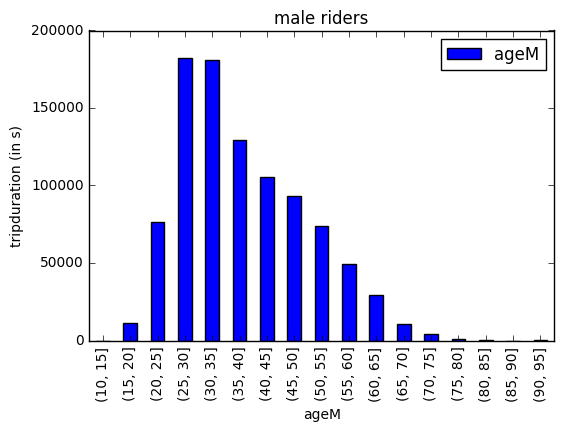

In [187]:
bins = np.arange(10, 99, 5)
ax = df.ageM.groupby(pd.cut(df.ageM, bins)).agg('count').plot(kind='bar', 
                                                                legend=False)
ax.set_title("male riders")
ax.set_xlabel("ageM")
ax.set_ylabel("tripduration (in s)")
plt.legend()

### Male riders activities in Jun 2016

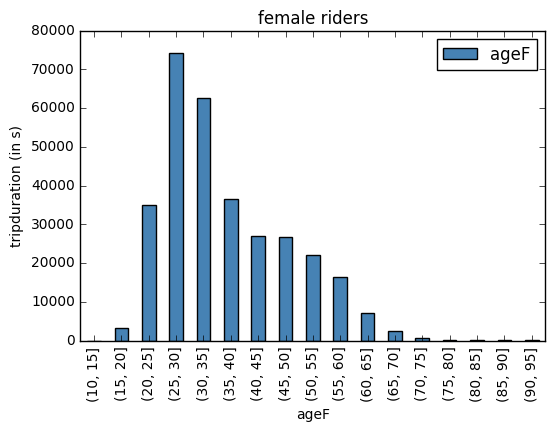

In [188]:
bins = np.arange(10, 99, 5)
ax = df.ageF.groupby(pd.cut(df.ageF, bins)).agg('count').plot(kind='bar', 
                                                                legend=False,color="SteelBlue")
ax.set_title("female riders")
ax.set_xlabel("ageF")
ax.set_ylabel("tripduration (in s)")
plt.legend()

### Check the difference

ageM
(10, 15]    0.000000
(15, 20]    0.001804
(20, 25]    0.028723
(25, 30]    0.072360
(30, 35]    0.080015
(35, 40]    0.059895
(40, 45]    0.034306
(45, 50]    0.021237
(50, 55]    0.013730
(55, 60]    0.013854
(60, 65]    0.005400
(65, 70]    0.002165
(70, 75]    0.000173
(75, 80]    0.000019
(80, 85]    0.000061
(85, 90]    0.000010
(90, 95]    0.000000
dtype: float64


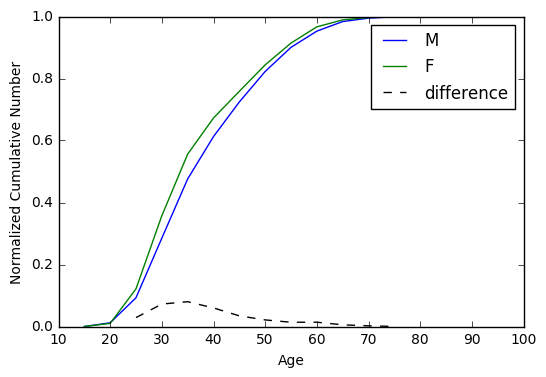

In [149]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg('count').cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg('count').cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k--',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

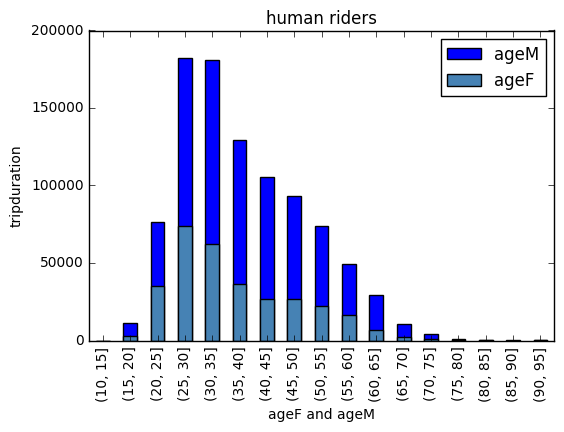

In [196]:
bins = np.arange(10, 99, 5)
ax = df.ageM.groupby(pd.cut(df.ageM, bins)).agg('count').plot(kind='bar', 
                                                                legend=False)

ax = df.ageF.groupby(pd.cut(df.ageF, bins)).agg('count').plot(kind='bar',
                                                                legend=False,color="SteelBlue")
ax.set_title("human riders")
ax.set_xlabel("ageF and ageM")
ax.set_ylabel("tripduration")
plt.legend()

### Combine the data

In [159]:
df['age'] = 2016 - df['birth year']

In [160]:
# df.head()

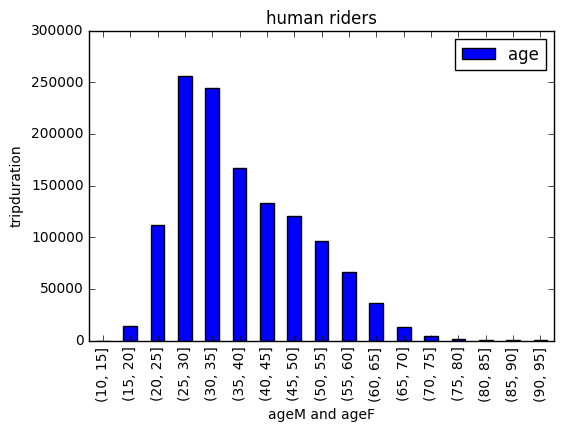

In [161]:
bins = np.arange(10, 99, 5)
ax = df.age.groupby(pd.cut(df.age, bins)).agg('count').plot(kind='bar', 
                                                                legend=False)
ax.set_title("human riders")
ax.set_xlabel("ageM and ageF")
ax.set_ylabel("tripduration")
plt.legend()

### Find the mean and std deviation of our sample (df.age)

In [167]:
np.mean(df.age)

38.340581703438112

In [169]:
np.std(df.age)

11.577160518255466

In [181]:
import scipy.stats

## Perform the Kolmogorov-Smirnov test for goodness of fit.

### $H_0$: The citibike riders age distribution is identical to Normal distribution 
### P1 = P2
### $H_A$: The citibike reider age distribution is not identical to Normal distribution
### P1 != P2
### $\alpha$ = 0.05

In [186]:
print (scipy.stats.kstest(df.age,'norm'))

KstestResult(statistic=1.0, pvalue=0.0)


### This is a two tailed test (default), accroding to the result p-value is really small (much smaller than 0.05) , so we reject the $H_0$. i.e. the rider age distribution is not identical to the normal distribution at 95% confidence level.

## Performance Anderson-Darling test for data coming from a particular distribution

### $H_0$: The citibike riders age distribution follows a particular distribution (normal, exponential, logistic, or Gumbel distribution)
### P1 = P2
### $H_A$: The citibike reider age distribution does not follows a particular distribution (normal, exponential, logistic, or Gumbel distribution)
### P1 != P2
### (This test does not need an $\alpha$ value?)

In [185]:
print (scipy.stats.anderson(df.age, dist='norm'))

AndersonResult(statistic=20106.901539644226, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


### According to the result, the critical values are all greater than the signicance level , so we reject the $H_0$.i.e. the rider age distribution does not follows a particular distribution.

In [216]:
# df.age

In [189]:
# pl.hist(df.age)

## Test at Normal Distribution
### Test sample ($\mu$, $\sigma$) = ( 38.340581703438112, 11.577160518255466) 

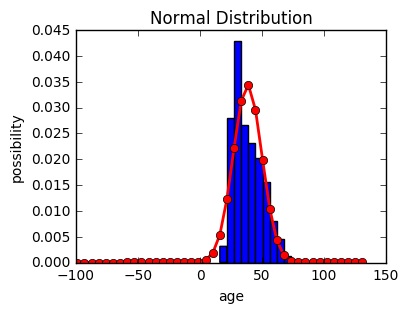

In [202]:
import matplotlib.pyplot as plt
#count, bins, ignored = plt.hist(df.age, 20, normed=True)
#print (bins)
fig, ax = plt.subplots(figsize=(4, 3))
mu = np.mean(df.age)
sigma = np.std(df.age)
count, bins, ignored = plt.hist(df.age, 20, normed=True)
binsl = np.concatenate([np.array([16.0 - nb * (bins[1]-bins[0]) for nb in range(len(bins))])[-1:0:-1], bins])
#print (binsl)
plt.plot(binsl, 1/(sigma * np.sqrt(2 * np.pi)) * # The equal is probability density for the Gaussian distribution 
               np.exp( - (binsl - mu)**2 / (2 * sigma**2) ), '-o', 
         linewidth=2, color='r')
plt.xlabel('age')
plt.ylabel('possibility')
plt.title('Normal Distribution')

plt.show()
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html

## Test at Poisson Distribution
### Test sample ($\mu$, $\sigma$) = ( 38.340581703438112, 11.577160518255466) 

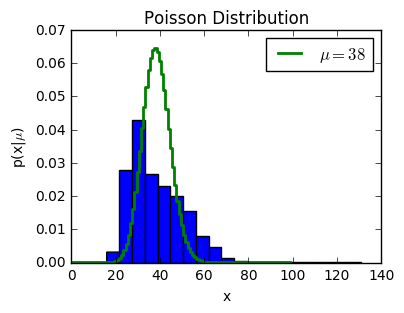

In [218]:
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt

mu = np.mean(df.age)
linestyles = ['-']

fig, ax = plt.subplots(figsize=(4, 3))
dist = poisson(mu)
x = np.arange(1, 100)

count, bins, ignored = plt.hist(df.age, 20, normed=True)

plt.plot(x, dist.pmf(x), ls=ls, color='green',
             label=r'$\mu=%i$' % mu, linestyle='steps-mid',linewidth=2)

plt.xlabel('x')
plt.ylabel('p(x|$\mu$)')
plt.title('Poisson Distribution')

plt.legend()
plt.show()

# http://www.astroml.org/book_figures/chapter3/fig_poisson_distribution.html